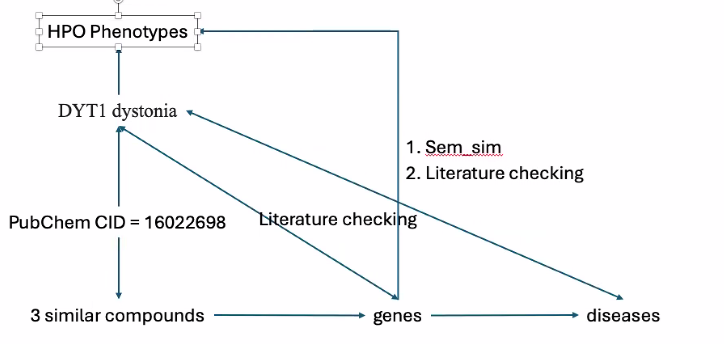


In [ ]:
!pip install chembl-webresource-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 527.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.8 MB/s eta 0:00:00


##Step1: finding similiar compunds

In [ ]:
from chembl_webresource_client.new_client import new_client
def perform_similarity_search(smiles, threshold=80):
    similarity = new_client.similarity
    # Perform similarity search using ChEMBL's similarity search API
    res = similarity.filter(smiles=smiles, similarity=threshold).only(['molecule_chembl_id', 'similarity'])
    similar_compounds = [(entry['molecule_chembl_id'],round(float(entry['similarity']),2)) for entry in res]
    similar_compounds_ = [entry['molecule_chembl_id'] for entry in res]
    return similar_compounds_

# Screening compounds with their IDs and SMILES strings
screening_compounds = {
    'NCGC00125704': 'CC1=CC=C(C=C1)N2C(=C3C(=NN(C(=O)C3=N2)CCCC(=O)NCC4=C(C(=CC=C4)OC)OC)C)C'}

#    'NCGC00602080-03': 'CC1=C2C(=NN1C3=CC=C(C)C=C3)C(=O)N(CCCCNCCC4=C(F)C=CC=C4)N=C2C',
 #   'NCGC00685598-01': 'CC1=C2C(=NN1C3=CC=C(C)C=C3)C(=O)N(CCCCNCCC4=CC=CC=C4)N=C2C',
  #  'NCGC00685517-01': 'CC1=C2C(=NN1C3=CC=C(C)C=C3)C(=O)N(CCCCNCCC4=CC=CC(F)=C4)N=C2C',
   # 'NCGC00686269-01': 'CC1=C2C(=NN1C3=CC=C(C)C=C3)C(=O)N(CCCCNCCC4=CC(F)=CC(F)=C4)N=C2C'}

#NCGC00125704.
#Pubchem SID 24401087
#Compound CID: 16022698


# Perform chemical structure similarity search against ChEMBL for each screening compound
similar_compounds_dict = {}
for compound_id, compound_smiles in screening_compounds.items():
    similar_compounds = perform_similarity_search(compound_smiles)
    print(similar_compounds)
    similar_compounds_dict[compound_id] = similar_compounds

similar_compounds_dict

['CHEMBL1372162', 'CHEMBL1367890', 'CHEMBL1733809']


{'NCGC00125704': ['CHEMBL1372162', 'CHEMBL1367890', 'CHEMBL1733809']}

##Finding Gene for each similiar conpund:

In [ ]:
from chembl_webresource_client.new_client import new_client

# Function to retrieve targets associated with a ChEMBL ID
def get_gene_symbols(entry):
    gene_symbols = []
    for component in entry['target_components']:
        for synonym in component['target_component_synonyms']:
            #if synonym['syn_type'] in ['GENE_SYMBOL', 'GENE_SYMBOL_OTHER']:
                gene_symbols.append(synonym['component_synonym'])
    return tuple(gene_symbols)  # Convert list to tuple

def get_targets(chembl_id):
    target_client = new_client.target
    # Retrieve targets associated with the ChEMBL ID
    res = target_client.filter(target=chembl_id,organism='Homo sapiens').only(['target_chembl_id','organism','pref_name','target_components'])
    res = res[:10]
    print(res)

    # Extract the target ChEMBL IDs
    return {(entry['organism'], entry['target_chembl_id'], entry['pref_name'], get_gene_symbols(entry)) for entry in res}

    #return {(entry['organism'],entry['target_chembl_id'], entry['pref_name']) for entry in res}


import time
def find_shared_targets(chembl_ids):
    shared_targets = []
    for chembl_id in chembl_ids:
        start_time = time.time()  # Start time of the process
        print(chembl_id, 'is processing...')
        targets = get_targets(chembl_id)  # Assuming get_targets function is defined elsewhere
        end_time = time.time()  # End time of the process
        process_time = end_time - start_time  # Calculate the time taken for the process
        print(f"{chembl_id} processing completed in {process_time} seconds.")
        shared_targets.append(targets)
    return shared_targets

# Get targets associated with ChEMBL compounds
chembl_targets = set()
for similar_compounds in similar_compounds_dict.values():
    chembl_targets.update(similar_compounds)

# Find shared targets
shared_targets = find_shared_targets( chembl_targets)
#print("Shared Targets:", list(shared_targets))  # Convert set to list for printing

CHEMBL1372162 is processing...
[{'organism': 'Homo sapiens', 'pref_name': 'Maltase-glucoamylase', 'target_chembl_id': 'CHEMBL2074', 'target_components': [{'accession': 'O43451', 'component_description': 'Maltase-glucoamylase', 'component_id': 434, 'component_type': 'PROTEIN', 'relationship': 'SINGLE PROTEIN', 'target_component_synonyms': [{'component_synonym': '3.2.1.20', 'syn_type': 'EC_NUMBER'}, {'component_synonym': 'Alpha-1,4-glucosidase', 'syn_type': 'UNIPROT'}, {'component_synonym': 'Maltase-glucoamylase', 'syn_type': 'UNIPROT'}, {'component_synonym': 'MGA', 'syn_type': 'GENE_SYMBOL_OTHER'}, {'component_synonym': 'MGAM', 'syn_type': 'GENE_SYMBOL'}, {'component_synonym': 'MGAML', 'syn_type': 'GENE_SYMBOL_OTHER'}, {'component_synonym': 'Synonyms=MGA', 'syn_type': 'GENE_SYMBOL_OTHER'}], 'target_component_xrefs': [{'xref_id': 'O43451', 'xref_name': None, 'xref_src_db': 'ExpressionAtlas'}, {'xref_id': 'GO:0005886', 'xref_name': 'plasma membrane', 'xref_src_db': 'GoComponent'}, {'xref_

In [ ]:
def get_targets(chembl_id):
    target_client = new_client.target
    # Retrieve targets associated with the ChEMBL ID
    res = target_client.filter(target=chembl_id,organism='Homo sapiens').only(['target_chembl_id','organism','pref_name','target_components'])
    res = res[:20]
    # Extract the target ChEMBL IDs
    return {(entry['organism'], entry['target_chembl_id'], entry['pref_name'], get_gene_symbols(entry)) for entry in res}

A=get_targets('CHEMBL1367890')
B=get_targets('CHEMBL1829')
A==B

True

In [ ]:
shared_targets[1]

{'CHEMBL1367890', 'CHEMBL1372162', 'CHEMBL1733809'}

In [ ]:
Genes_=[]
for i in shared_targets:
  symbols1=[]
  for j in i:
    symbols1+=list(j[3])
  Genes_.append(list(set(symbols1)))

https://www.ebi.ac.uk/chembl/g/#search_results/all/query=CHEMBL1372162

https://www.ebi.ac.uk/chembl/target_report_card/CHEMBL2902/

https://www.uniprot.org/uniprotkb/P00381/entry


In [ ]:
['CHEMBL1372162', 'CHEMBL1367890', 'CHEMBL1733809']

#Genes_predicton=[['folA','ampC','F10','THRB','USP7'],[],[]]
Genes_=[['TGR','TARDBP','ampC','NFE2L2','EHMT2','CBX1','TDP1'],['CGA','PTH1R','SMAD3','EHMT2','GMNN','TDP1'],['CGA','EHMT2']]


##Fidning Disaese/Phenotypes associated to these Genes

In [ ]:
import json
import pandas as pd

# Read the JSON file
file_path = '/content/hp.json'
with open(file_path, 'r') as file:
    data = json.load(file)
# Extract relevant information from the JSON dat
graphs = data['graphs']
nodes = graphs[0]['nodes']  # Assuming there's only one graph in the JSON data
# Initialize lists to store data
ids = []
labels = []
types = []
# Iterate over the nodes and extract the required information
for node in nodes:
    ids.append(node['id'])
    labels.append(node.get('lbl', ''))
    types.append(node.get('type', ''))
# Create a DataFrame from the extracted data
HP = pd.DataFrame({
    'id': ids,
    'label': labels,
    'type': types
})

import pandas as pd
phenotype_to_genes = pd.read_csv('/content/phenotype_to_genes.txt', sep='\t')
genes_to_phenotype = pd.read_csv('/content/genes_to_phenotype.txt', sep='\t')
genes_to_disease = pd.read_csv('/content/genes_to_disease.txt', sep='\t')
phenotype = pd.read_csv('/content/phenotype.hpoa', sep='\t', skiprows=4)

<ipython-input-2-781703eb0002>:31: DtypeWarning: Columns (2,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  phenotype = pd.read_csv('/content/phenotype.hpoa', sep='\t', skiprows=4)


Finiding phenotypes

In [ ]:
max_length = max([len(genes) for genes in Genes_])
shared_gene_phenotype_table = pd.DataFrame(index=range(max_length))
# Populate the DataFrame
for i in range(len(Genes_)):
    col_name = 'shared_gene_' + str(i)
    genes = Genes_[i]
    shared_gene_phenotype_table[col_name] = pd.Series(genes)
shared_gene_phenotype_table = shared_gene_phenotype_table.fillna('None')
print(shared_gene_phenotype_table)

  shared_gene_0 shared_gene_1 shared_gene_2
0           TGR           CGA           CGA
1        TARDBP         PTH1R         EHMT2
2          ampC         SMAD3          None
3        NFE2L2         EHMT2          None
4         EHMT2          GMNN          None
5          CBX1          TDP1          None
6          TDP1          None          None


In [ ]:
import pandas as pd
#shared_gene_phenotype_table = pd.read_csv('/content/shared_gene_phenotype_table.csv')
genes_to_phenotype = pd.read_csv('/content/genes_to_phenotype.txt', sep='\t')
# Preprocess genes_to_phenotype DataFrame
gene_to_hpo_dict = genes_to_phenotype.groupby('gene_symbol').agg({'hpo_name': list}).to_dict()['hpo_name']
gene_to_hpo_dict_lower = {key.lower(): value for key, value in gene_to_hpo_dict.items()}
# Modify the function to use the preprocessed dictionary
def finding_hpo(x):
    return list(set(gene_to_hpo_dict_lower.get(x.lower(), [])))

# Apply the function
shared_gene_phenotype_table['phenotype_0'] = shared_gene_phenotype_table['shared_gene_0'].str.lower().apply(finding_hpo)
shared_gene_phenotype_table['phenotype_1'] = shared_gene_phenotype_table['shared_gene_1'].str.lower().apply(finding_hpo)
shared_gene_phenotype_table['phenotype_2'] = shared_gene_phenotype_table['shared_gene_2'].str.lower().apply(finding_hpo)
#shared_gene_phenotype_table['phenotype'] = shared_gene_phenotype_table.apply(lambda x: x['phenotype'] + [x['shared_gene']], axis=1)
#shared_gene_phenotype_table['shared_gene'] = shared_gene_phenotype_table.apply(lambda x:  [x['shared_gene_1']], axis=1)

#shared_gene_phenotype_table=shared_gene_phenotype_table.dropna()
shared_gene_phenotype_table


,shared_gene_0,shared_gene_1,shared_gene_2,phenotype_0,phenotype_1,phenotype_2
0,TGR,CGA,CGA,[],[],[]
1,TARDBP,PTH1R,EHMT2,"[Progressive cerebellar ataxia, Anxiety, Jaw h...","[Broad ribs, Platyspondyly, Long philtrum, Cho...",[]
2,ampC,SMAD3,None,[],"[Abdominal aortic aneurysm, Coronary artery at...",[]
3,NFE2L2,EHMT2,None,"[Muscle weakness, Decreased circulating IgA le...",[],[]
4,EHMT2,GMNN,None,[],"[Laryngomalacia, Strabismus, Breast aplasia, D...",[]
5,CBX1,TDP1,None,[],"[Cerebral atrophy, Decreased number of periphe...",[]
6,TDP1,None,None,"[Cerebral atrophy, Decreased number of periphe...",[],[]


In [ ]:
phenotype_tor1a=list(set(finding_hpo('tor1a')))


Shared_pheno=[]
n=0
for cc in ['shared_gene_0','shared_gene_1','shared_gene_2']:
  shared_gene_phenotype_table[cc+'_phen'] =None
  shared_gene_phenotype_table[cc+'_phen'] = shared_gene_phenotype_table[cc+'_phen'].astype(object)
  for i in shared_gene_phenotype_table.index:
   X=[]
   if type(shared_gene_phenotype_table['phenotype_'+str(n)][i] )==list:
    for j in shared_gene_phenotype_table['phenotype_'+str(n)][i]:
         if j in phenotype_tor1a:
              print(cc,j)
              X.append(j)
    shared_gene_phenotype_table.at[i, cc+'_phen']=X
  n+=1
           #Shared_pheno.append(shared_gene_phenotype_table['shared_gene_0'][i])
           #print(shared_gene_phenotype_table['shared_gene_0'][i])
           #break
shared_gene_phenotype_table

shared_gene_0 Anxiety
shared_gene_0 Dysarthria
shared_gene_0 Dysphagia
shared_gene_0 Depression
shared_gene_0 Babinski sign
shared_gene_0 Autosomal dominant inheritance
shared_gene_0 Ptosis
shared_gene_0 Hyperreflexia
shared_gene_0 Delayed speech and language development
shared_gene_0 Tremor
shared_gene_0 Growth delay
shared_gene_0 Autosomal dominant inheritance
shared_gene_0 Intrauterine growth retardation
shared_gene_0 Dysarthria
shared_gene_0 Cerebellar atrophy
shared_gene_0 Autosomal recessive inheritance
shared_gene_1 Long philtrum
shared_gene_1 Anteverted nares
shared_gene_1 Autosomal dominant inheritance
shared_gene_1 Autosomal recessive inheritance
shared_gene_1 Polyhydramnios
shared_gene_1 Motor delay
shared_gene_1 Micrognathia
shared_gene_1 Talipes equinovarus
shared_gene_1 Autosomal dominant inheritance
shared_gene_1 Camptodactyly
shared_gene_1 Inguinal hernia
shared_gene_1 Scoliosis
shared_gene_1 Micrognathia
shared_gene_1 Umbilical hernia
shared_gene_1 Cardiac arrest
share

,shared_gene_0,shared_gene_1,shared_gene_2,phenotype_0,phenotype_1,phenotype_2,shared_gene_0_phen,shared_gene_1_phen,shared_gene_2_phen
0,TGR,CGA,CGA,[],[],[],[],[],[]
1,TARDBP,PTH1R,EHMT2,"[Progressive cerebellar ataxia, Anxiety, Jaw h...","[Broad ribs, Platyspondyly, Long philtrum, Cho...",[],"[Anxiety, Dysarthria, Dysphagia, Depression, B...","[Long philtrum, Anteverted nares, Autosomal do...",[]
2,ampC,SMAD3,None,[],"[Abdominal aortic aneurysm, Coronary artery at...",[],[],"[Talipes equinovarus, Autosomal dominant inher...",[]
3,NFE2L2,EHMT2,None,"[Muscle weakness, Decreased circulating IgA le...",[],[],"[Delayed speech and language development, Trem...",[],[]
4,EHMT2,GMNN,None,[],"[Laryngomalacia, Strabismus, Breast aplasia, D...",[],[],"[Strabismus, Anteverted nares, Global developm...",[]
5,CBX1,TDP1,None,[],"[Cerebral atrophy, Decreased number of periphe...",[],[],"[Dysarthria, Cerebellar atrophy, Autosomal rec...",[]
6,TDP1,None,None,"[Cerebral atrophy, Decreased number of periphe...",[],[],"[Dysarthria, Cerebellar atrophy, Autosomal rec...",[],[]


Finding disease

In [ ]:
!pip install requests
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup

In [ ]:
n=0
for cc in ['shared_gene_0','shared_gene_1','shared_gene_2']:
   shared_gene_phenotype_table['dis_'+str(n)] =None
   shared_gene_phenotype_table['dis_'+str(n)] = shared_gene_phenotype_table[cc+'_phen'].astype(object)
   for i in shared_gene_phenotype_table.index:
          gene__=shared_gene_phenotype_table[cc][i]
          shared_gene_phenotype_table.at[i,'dis_'+str(n)] =list(genes_to_disease[genes_to_disease['gene_symbol'].str.lower()==gene__.lower()]['disease_id'])
   n+=1
shared_gene_phenotype_table

,shared_gene_0,shared_gene_1,shared_gene_2,phenotype_0,phenotype_1,phenotype_2,shared_gene_0_phen,shared_gene_1_phen,shared_gene_2_phen,dis_0,dis_1,dis_2
0,TGR,CGA,CGA,[],[],[],[],[],[],[],[],[]
1,TARDBP,PTH1R,EHMT2,"[Progressive cerebellar ataxia, Anxiety, Jaw h...","[Broad ribs, Platyspondyly, Long philtrum, Cho...",[],"[Anxiety, Dysarthria, Dysphagia, Depression, B...","[Long philtrum, Anteverted nares, Autosomal do...",[],"[OMIM:612069, ORPHA:275872, ORPHA:803]","[OMIM:215045, OMIM:600002, OMIM:156400, OMIM:1...",[]
2,ampC,SMAD3,None,[],"[Abdominal aortic aneurysm, Coronary artery at...",[],[],"[Talipes equinovarus, Autosomal dominant inher...",[],[],"[OMIM:613795, ORPHA:60030, ORPHA:91387, ORPHA:...",[]
3,NFE2L2,EHMT2,None,"[Muscle weakness, Decreased circulating IgA le...",[],[],"[Delayed speech and language development, Trem...",[],[],"[OMIM:617744, ORPHA:619979]",[],[]
4,EHMT2,GMNN,None,[],"[Laryngomalacia, Strabismus, Breast aplasia, D...",[],[],"[Strabismus, Anteverted nares, Global developm...",[],[],"[OMIM:616835, ORPHA:2554]",[]
5,CBX1,TDP1,None,[],"[Cerebral atrophy, Decreased number of periphe...",[],[],"[Dysarthria, Cerebellar atrophy, Autosomal rec...",[],[],"[OMIM:607250, ORPHA:94124]",[]
6,TDP1,None,None,"[Cerebral atrophy, Decreased number of periphe...",[],[],"[Dysarthria, Cerebellar atrophy, Autosomal rec...",[],[],"[OMIM:607250, ORPHA:94124]",[],[]


In [ ]:
All_dis=list(set(sum(shared_gene_phenotype_table['dis_0'], [])
+sum(shared_gene_phenotype_table['dis_1'], [])
+sum(shared_gene_phenotype_table['dis_2'], [])   ))
df=pd.DataFrame()
df['Disease']=All_dis
df

,Disease
0,ORPHA:275872
1,ORPHA:296
2,ORPHA:619979
3,ORPHA:2554
4,ORPHA:79106
5,ORPHA:91387
6,OMIM:125350
7,ORPHA:94124
8,OMIM:156400
9,ORPHA:50945


Orpha: https://www.orpha.net/en/disease/detail/746

In [ ]:
def get_info(num):
  # URL of the page to scrape
  url = "https://www.orpha.net/en/disease/detail/"+str(num)
  # Send a GET request to the URL
  response = requests.get(url)
  # Parse the HTML content
  soup = BeautifulSoup(response.text, 'html.parser')
  # Find the title tag and extract its text
  title_tag = soup.find('title')
  title = title_tag.text if title_tag else None
  ##########################################################
  # Find the <strong> tag with the text "Synonym(s):"
  synonyms=None
  synonym_tag = soup.find('strong', string="Synonym(s): ")
  # If the <strong> tag is found
  if synonym_tag:
        # Find the <ul> tag following the <strong> tag
        ul_tag = synonym_tag.find_next('ul')
        # Find all <li> tags within the <ul> tag
        synonym_tags = ul_tag.find_all('li')
        # Extract and return the synonyms
        synonyms = [tag.get_text(strip=True) for tag in synonym_tags]
        synonyms= ", ".join(synonyms)
  ##########################################################
  # Find the <strong> tag with the class "d-block mb-3 service-color" containing the text "Disease definition"
  Dis_def=None
  definition_strong = soup.find('strong', class_="d-block mb-3 service-color", string="Disease definition")
  # If the <strong> tag is found
  if definition_strong:
        # Get the next <p> tag which contains the disease definition
        definition_p = definition_strong.find_next('p')
        # If <p> tag exists
        if definition_p:
            # Extract and return the disease definition
            Dis_def= definition_p.get_text(strip=True)
    # If disease definition is not found
  ##########################################################
  Clinical_des=None
  # Find the <div> tag with the class "fs-5 orpha-blue" containing the text "Clinical description"
  clinical_div = soup.find('div', class_="fs-5 orpha-blue", string="Clinical description")
  # If the <div> tag is found
  if clinical_div:
        # Get the next <p> tag which contains the clinical description
        clinical_p = clinical_div.find_next('p')
        # If <p> tag exists
        if clinical_p:
            # Extract and return the clinical description
            Clinical_des= clinical_p.get_text(strip=True)
  return title, synonyms, Dis_def, Clinical_des


'''
import requests
from bs4 import BeautifulSoup
def get_name(num):
  # URL of the page to scrape
  url = "https://www.orpha.net/en/disease/detail/"+str(num)
  # Send a GET request to the URL
  response = requests.get(url)
  # Parse the HTML content
  soup = BeautifulSoup(response.text, 'html.parser')
  # Find the title tag and extract its text
  title_tag = soup.find('title')
  title = title_tag.text if title_tag else "Title not found"
  # Print the extracted title
  return title
  #print("Title:", title)
def find_dis(y):
  if y[:6] =='ORPHA:':
      return get_name(y[6:])

df['disease_name']= df.apply(lambda x: find_dis(x['Disease']), axis=1)
df.head()
'''
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor

def get_name(num):
    # URL of the page to scrape
    url = "https://www.orpha.net/en/disease/detail/" + str(num)
    # Send a GET request to the URL
    response = requests.get(url)
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    # Find the title tag and extract its text
    title_tag = soup.find('title')
    title = title_tag.text if title_tag else "Title not found"
    # Print the extracted title
    return title

def find_dis(y):
    if y[:6] == 'ORPHA:':
        return get_info(y[6:])
    else:
      return None, None, None, None
# Assuming df is your pandas DataFrame
# Modify df in-place, so we don't need to return a new DataFrame
# We'll use a ThreadPoolExecutor to make asynchronous requests
with ThreadPoolExecutor(max_workers=10) as executor:
    # Apply the find_dis function to each row in parallel
    df['disease_name'], df['Syn'], df['disease_des/def'], df['Clinicalfeatures/Clinical_des']  =zip(*list(executor.map(find_dis, df['Disease'])))
 #list(executor.map(find_dis, df['Disease']))



# Print the modified DataFrame
df2= df.dropna(subset=['disease_name'])
df_unique_1 = df2.drop_duplicates(subset=['disease_name'])
df_unique_1

,Disease,disease_name,Syn,disease_des/def,Clinicalfeatures/Clinical_des
0,ORPHA:275872,Orphanet: Frontotemporal dementia with motor n...,"FTD-ALS, FTD-MND, Frontotemporal dementia with...",Frontotemporal dementia with motor neuron dise...,None
1,ORPHA:296,Orphanet: Ollier disease,"Enchondromatosis Spranger type I, Multiple Enc...",A rare primary bone dysplasia characterized by...,Clinical expression of the disease is variable...
2,ORPHA:619979,Orphanet: Developmental delay-immunodeficiency...,None,A rare syndrome with combined immunodeficiency...,None
3,ORPHA:2554,Orphanet: Ear-patella-short stature syndrome,Meier-Gorlin syndrome,A rare microcephalic primordial dwarfism chara...,None
4,ORPHA:79106,Orphanet: Eiken syndrome,None,"A rare, genetic, primary bone dysplasia syndro...",None
5,ORPHA:91387,Orphanet: Familial thoracic aortic aneurysm an...,"Familial TAAD, Familial non-syndromic thoracic...",Familial thoracic aortic aneurysm and aortic d...,None
7,ORPHA:94124,Orphanet: Spinocerebellar ataxia with axonal n...,SCAN1,Spinocerebellar ataxia with axonal neuropathy ...,None
9,ORPHA:50945,Orphanet: Blomstrand lethal chondrodysplasia,"BLC, BOCD, Blomstrand chondrodysplasia, Blomst...",Blomstrand lethal chondrodysplasia (BLC) is a ...,BLC is a congenital disorder characterized by ...
12,ORPHA:284984,Orphanet: Aneurysm-osteoarthritis syndrome,None,"A rare, genetic, systemic disease characterize...",None
13,ORPHA:803,Orphanet: Amyotrophic lateral sclerosis,"ALS, Charcot disease, Lou Gehrig disease",A neurodegenerative disease characterized by p...,Approximately two thirds of patients with typi...


https://www.omim.org/entry/313490

In [ ]:
import pandas as pd
# Read the contents of omim_info.txt into a Pandas DataFrame
omim_info = pd.read_csv('omim_info.txt', sep='\t',  header=3)
# Display the DataFrame
display(omim_info.head())

import requests
from bs4 import BeautifulSoup

def get_description_and_clinical_features(num):
    # URL of the page to scrape
    url = f"https://api.omim.org/api/entry?mimNumber={num}&apiKey=FNQbzW08SSWjNwMbMFBrhw&include=text"
    # Send a GET request to the URL
    response = requests.get(url)
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the description section
    description_section = soup.find('textsectionname', string="description")
    # If description section is found, get the content
    description_content = description_section.find_next_sibling('textsectioncontent').get_text(strip=True) if description_section else None

    # Find the clinical features section
    clinical_features_section = soup.find('textsectionname', string="clinicalFeatures")
    # If clinical features section is found, get the content
    clinical_features_content = clinical_features_section.find_next_sibling('textsectioncontent').get_text(strip=True) if clinical_features_section else None

    return description_content, clinical_features_content

get_description_and_clinical_features(str(620283))


def find_dis_omim(number_to_search):
 result_df = omim_info[omim_info['# Phenotype'].str.contains(number_to_search)]
 result_df.index=range(result_df.shape[0])
 description_, _clinical_features=get_description_and_clinical_features(number_to_search)
 return result_df['# Phenotype'][0] , result_df['Gene/Locus And Other Related Symbols'][0],description_, _clinical_features


number_to_search = "202110"
find_dis_omim(number_to_search)
find_dis_omim('620283')

def find_dis_from_omim(y):
    if y[:5] == 'OMIM:':
      try:
        return find_dis_omim(str(y[5:]))
      except:
        pass
    return None, None, None, None
df['disease_name'], df['Syn'], df['disease_des/def'], df['Clinicalfeatures/Clinical_des'] = zip(*df.apply(lambda x: find_dis_from_omim(x['Disease']), axis=1))
df2= df.dropna(subset=['disease_name'])
df_unique_2 = df2.drop_duplicates(subset=['disease_name'])
df_unique_2

,# Phenotype,Gene/Locus And Other Related Symbols,MIM Number,Cyto Location
0,"17,20-lyase deficiency, isolated, 202110 (3)","CYP17A1, CYP17, P450C17",609300.0,10q24.32
1,"17-alpha-hydroxylase/17,20-lyase deficiency, 2...","CYP17A1, CYP17, P450C17",609300.0,10q24.32
2,"2,4-dienoyl-CoA reductase deficiency, 616034 (3)","NADK2, C5orf33, DECRD",615787.0,5p13.2
3,"2-methylbutyrylglycinuria, 610006 (3)","ACADSB, SBCAD",600301.0,10q26.13
4,"3-M syndrome 1, 273750 (3)","CUL7, 3M1",609577.0,6p21.1


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


,Disease,disease_name,Syn,disease_des/def,Clinicalfeatures/Clinical_des
6,OMIM:125350,"Failure of tooth eruption, primary, 125350 (3)","PTH1R, PTHR1, PTHR, PFE, EKNS",Primary failure of tooth eruption (PFE) is an ...,{10:Shokeir (1974)} described autosomal domina...
8,OMIM:156400,"Metaphyseal chondrodysplasia, Murk Jansen type...","PTH1R, PTHR1, PTHR, PFE, EKNS",The Murk Jansen type of metaphyseal chondrodys...,{17:Stoeckenius (1966)} described affected mot...
10,OMIM:607250,"?Spinocerebellar ataxia, autosomal recessive, ...","TDP1, SCAN1",Spinocerebellar ataxia with axonal neuropathy-...,{2:Takashima et al. (2002)} investigated a lar...
11,OMIM:612069,"Amyotrophic lateral sclerosis 10, with or with...","TARDBP, TDP43, ALS10",None,{14:Tagawa et al. (2007)} described a Japanese...
14,OMIM:215045,"Chondrodysplasia, Blomstrand type, 215045 (3)","PTH1R, PTHR1, PTHR, PFE, EKNS",Blomstrand chondrodysplasia is an autosomal re...,{1:Blomstrand et al. (1985)} presented the cli...
15,OMIM:616835,"Meier-Gorlin syndrome 6, 616835 (3)","GMNN, MGORS6",None,{2:Burrage et al. (2015)} described 3 unrelate...
16,OMIM:613795,"Loeys-Dietz syndrome 3, 613795 (3)","SMAD3, MADH3, LDS3",Loeys-Dietz syndrome-3 (LDS3) is an autosomal ...,{3:Van de Laar et al. (2011)} studied 3 unrela...
17,OMIM:600002,"Eiken syndrome, 600002 (3)","PTH1R, PTHR1, PTHR, PFE, EKNS",Eiken syndrome (EKNS) is an autosomal recessiv...,In a consanguineous Turkish family living in D...
21,OMIM:617744,"Immunodeficiency, developmental delay, and hyp...","NFE2L2, NRF2, IMDDHH",IMDDHH is a multisystem disorder characterized...,{1:Huppke et al. (2017)} reported 4 unrelated ...


In [ ]:
concatenated_df = pd.concat([df_unique_2, df_unique_1], ignore_index=True)
concatenated_df

,Disease,disease_name,Syn,disease_des/def,Clinicalfeatures/Clinical_des
0,OMIM:125350,"Failure of tooth eruption, primary, 125350 (3)","PTH1R, PTHR1, PTHR, PFE, EKNS",Primary failure of tooth eruption (PFE) is an ...,{10:Shokeir (1974)} described autosomal domina...
1,OMIM:156400,"Metaphyseal chondrodysplasia, Murk Jansen type...","PTH1R, PTHR1, PTHR, PFE, EKNS",The Murk Jansen type of metaphyseal chondrodys...,{17:Stoeckenius (1966)} described affected mot...
2,OMIM:607250,"?Spinocerebellar ataxia, autosomal recessive, ...","TDP1, SCAN1",Spinocerebellar ataxia with axonal neuropathy-...,{2:Takashima et al. (2002)} investigated a lar...
3,OMIM:612069,"Amyotrophic lateral sclerosis 10, with or with...","TARDBP, TDP43, ALS10",None,{14:Tagawa et al. (2007)} described a Japanese...
4,OMIM:215045,"Chondrodysplasia, Blomstrand type, 215045 (3)","PTH1R, PTHR1, PTHR, PFE, EKNS",Blomstrand chondrodysplasia is an autosomal re...,{1:Blomstrand et al. (1985)} presented the cli...
5,OMIM:616835,"Meier-Gorlin syndrome 6, 616835 (3)","GMNN, MGORS6",None,{2:Burrage et al. (2015)} described 3 unrelate...
6,OMIM:613795,"Loeys-Dietz syndrome 3, 613795 (3)","SMAD3, MADH3, LDS3",Loeys-Dietz syndrome-3 (LDS3) is an autosomal ...,{3:Van de Laar et al. (2011)} studied 3 unrela...
7,OMIM:600002,"Eiken syndrome, 600002 (3)","PTH1R, PTHR1, PTHR, PFE, EKNS",Eiken syndrome (EKNS) is an autosomal recessiv...,In a consanguineous Turkish family living in D...
8,OMIM:617744,"Immunodeficiency, developmental delay, and hyp...","NFE2L2, NRF2, IMDDHH",IMDDHH is a multisystem disorder characterized...,{1:Huppke et al. (2017)} reported 4 unrelated ...
9,ORPHA:275872,Orphanet: Frontotemporal dementia with motor n...,"FTD-ALS, FTD-MND, Frontotemporal dementia with...",Frontotemporal dementia with motor neuron dise...,None


gene to diease name

In [ ]:
shared_gene_phenotype_table

n=0
for cc in ['shared_gene_0','shared_gene_1','shared_gene_2']:

  if cc== 'shared_gene_0': col='dis_0'
  if cc== 'shared_gene_1': col='dis_1'
  if cc== 'shared_gene_2': col='dis_2'
  for i in shared_gene_phenotype_table.index:
    XX=  shared_gene_phenotype_table[col][i]
    if XX !=[]:
      print(shared_gene_phenotype_table[cc][i],':')
      print('...........................................................')
      for k in XX:
          print(k,'.....:........,' ,concatenated_df  [concatenated_df['Disease']==k]['disease_name'].values[0])


TARDBP :
...........................................................
OMIM:612069 .....:........, Amyotrophic lateral sclerosis 10, with or without FTD
ORPHA:275872 .....:........, Orphanet: Frontotemporal dementia with motor neuron disease
ORPHA:803 .....:........, Orphanet: Amyotrophic lateral sclerosis
NFE2L2 :
...........................................................
OMIM:617744 .....:........, Immunodeficiency, developmental delay, and hypohomocysteinemia
ORPHA:619979 .....:........, Orphanet: Developmental delay-immunodeficiency-leukoencephalopathy-hypohomocysteinemia syndrome
TDP1 :
...........................................................
OMIM:607250 .....:........, Spinocerebellar ataxia, autosomal recessive, with axonal neuropathy 1
ORPHA:94124 .....:........, Orphanet: Spinocerebellar ataxia with axonal neuropathy type 1
PTH1R :
...........................................................
OMIM:215045 .....:........, Chondrodysplasia, Blomstrand type
OMIM:600002 .....:.....

# Semantic similairty

In [ ]:
!pip install transformers sentence-transformers datasets
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, models
from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup
import torch
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import time
import datetime
import random
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, RobertaTokenizer, RobertaModel
tokenizer = AutoTokenizer.from_pretrained('microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext')
class BertForSTS(torch.nn.Module):
    def __init__(self):
        super(BertForSTS, self).__init__()
        #self.bert = models.Transformer("bert-base-uncased", max_seq_length=512)
        self.bert = models.Transformer('microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', max_seq_length=1000)
        #model = AutoModel.from_pretrained(model_name)
        self.pooling_layer = models.Pooling(self.bert.get_word_embedding_dimension())
        self.sts_bert = SentenceTransformer(modules=[self.bert, self.pooling_layer])
    def forward(self, input_data):
        output = self.sts_bert(input_data)['sentence_embedding']
        return output
# Instantiate the model and move it to GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

model = BertForSTS()
model.to(device)
model.eval()
def predict_similarity(sentence_pair):
  test_input = tokenizer(sentence_pair, padding=True, truncation=True, return_tensors="pt").to(device) # max_length = 512,
  test_input['input_ids'] = test_input['input_ids']
  test_input['attention_mask'] = test_input['attention_mask']
  del test_input['token_type_ids']
  output = model(test_input)
  sim = torch.nn.functional.cosine_similarity(output[0], output[1], dim=0).item()
  return sim

from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/Finetunned_Bert_2.pt'
model = BertForSTS()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load(PATH, map_location=device))
model.eval()

print("##########################################################################################")
example_1=[ 'A cat is walking around a house.', 'A woman is peeling potato']
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")

print("##########################################################################################")
example_1=[  'arterial thoracic outlet syndrome',
 '''
 The objective of this project is to study the contribution of hemorrheology to arterial and venous thrombosis using the arterio-venous (A-V)
   ''']
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")


print("##########################################################################################")
example_1=['antisynthetase syndrome',
 '''
  A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyography, and muscle biopsy showing endomyial infiltration composed mainly of macrophages and lymphocytes. The features are non-specific, thus the disease should be distinguished from similar entities with specific clinical, immunological, histological features, notably dermatomyositis, immune-mediated necrotizing myopathy, anti-synthetase syndrome, inclusion body myositis, and myositis associated with other connective tissue disorder.
''']
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")

print("##########################################################################################")
##(one of its synonym is childhood cancer)
example_1=['mismatch repair cancer syndrome 1 '
,
'''
childhood cancer''']

print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")

print("##########################################################################################")
example_1=[  'polymyositis',
 '''
 A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyography, and muscle biopsy showing endomyial infiltration composed mainly of macrophages and lymphocytes. The features are non-specific, thus the disease should be distinguished from similar entities with specific clinical, immunological, histological features, notably dermatomyositis, immune-mediated necrotizing myopathy, anti-synthetase syndrome, inclusion body myositis, and myositis associated with other connective tissue disorder.
   '''
]
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")

def is_about_term(input_text, target_term):
  sentence_pair=[input_text, target_term]
  test_input = tokenizer(sentence_pair, padding=True, truncation=True, return_tensors="pt").to(device) # max_length = 512,
  test_input['input_ids'] = test_input['input_ids']
  test_input['attention_mask'] = test_input['attention_mask']
  del test_input['token_type_ids']
  output = model(test_input)
  sim = torch.nn.functional.cosine_similarity(output[0], output[1], dim=0).item()
  return  round(sim,2)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

No GPU available, using the CPU instead.


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Mounted at /content/drive


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


##########################################################################################
Sentence 1: A cat is walking around a house.
Sentence 2: A woman is peeling potato
Predicted similarity score: -0.09
##########################################################################################
Sentence 1: arterial thoracic outlet syndrome
Sentence 2: 
 The objective of this project is to study the contribution of hemorrheology to arterial and venous thrombosis using the arterio-venous (A-V)
   
Predicted similarity score: 0.35
##########################################################################################
Sentence 1: antisynthetase syndrome
Sentence 2: 
  A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyography, and muscle biopsy showing endomyial infiltration composed mainly of macrophages and lymphocytes. The features are non-specific

In [ ]:
Dis_desc_DYT1='''
'Dystonia' describes a neurologic condition characterized by involuntary, sustained muscle contractions affecting one or more sites of the body; 'torsion' refers to the twisting nature of body movements observed in dystonia. Dystonia has been classified as primary (dystonia as the sole or major symptom) or secondary (a symptom of another disorder), and by age of onset, muscle groups affected, and mode of inheritance (Muller and Kupke, 1990; Nemeth, 2002).
'''
Dis_Clincial_DYT1='''
Primary torsion dystonia (also known as 'idiopathic' torsion dystonia; ITD) usually begins in childhood or adolescence with involuntary posturing of the trunk, neck, or limbs (Marsden et al., 1976; Nemeth, 2002). Some patients have a myostatic picture, such as was described by Wechsler and Brock (1922). Johnson et al. (1962) described an extensively affected French-Canadian family. Age of onset of affected family members ranged from 6 to 42 years and severity of the disease varied considerably, with early-onset cases being severely affected. Minor manifestations interpreted as 'formes frustes' were found in some family members. In a large North American family of non-Jewish ancestry, Brin et al. (1989) found that age of onset ranged from 4 to 43 years (mean 14.4, median 10.0). Generalization occurred within a median time of 3 years and occurred earlier in cases with onset in the leg. One 6.5-year-old was unable to walk within 3 months of onset. Batshaw et al. (1985) described a patient with severe simulated torsion dystonia as the main feature of Munchausen syndrome.

Bressman et al. (1994) analyzed the haplotype of 174 Ashkenazi Jewish individuals affected with torsion dystonia. In this group, there were 90 carriers of the haplotype and 70 noncarriers. The authors found very striking differences in the phenotype between carriers and noncarriers. The age of onset in carriers was 12.5 years versus 36.5 years in the noncarriers. In 94% of carriers, symptoms began in a limb but only rarely in the neck and larynx. In contrast, the neck, larynx, or other cranial muscles were the site of onset in 79% of noncarriers. Discriminant analysis of limb onset, leg involvement, and age at onset distinguished haplotype carriers from noncarriers with 90% accuracy. In 23 of the 70 noncarriers, the disease was familial and included brachial, cervical, laryngeal, and facial dystonia.

Cheng et al. (1996) studied 49 probands with cervical or cranial dystonia with age of onset greater than 12 years and with a positive family history. They found that age of onset of clinical symptoms was earlier by an average of 21.25 years in the second generation than in the first, and suggested that an unstable trinucleotide repeat may be involved in adult-onset primary cranial or cervical dystonia.

Grundmann et al. (2003) stated that most cases of early-onset generalized dystonia are caused by a 3-bp deletion in the DYT1 gene (delE302/303; 605204.0001). They reported 6 patients with dystonia caused by the 3-bp deletion who exhibited wide phenotypic variability: 2 had classic early-onset primary generalized dystonia, 2 had multifocal dystonia (1 with cranial and cervical muscle involvement), and 2 had only writer's cramp with mild progression.

Kostic et al. (2006) reported a large Serbian family in which 7 members carried the delE302/303 DYT1 mutation (605204.0001). However, only 2 were affected by dystonia, indicating a penetrance of 29%. One of the affected individuals had late-onset mild torticollis, and the other had generalized jerky dystonia. In addition, 3 family members with dystonia did not carry the DYT1 mutation, indicating genetic heterogeneity or possibly a psychogenic origin. Kostic et al. (2006) commented on the phenotypic variability in this family.

Zirn et al. (2008) reported an 18-year-old girl with a severe form of early-onset dystonia. She had mildly delayed early motor development with stalling of further development during the second year of life. She never learned to walk independently and became wheelchair-bound at age 5 years. At age 13, she could no longer eat or drink without assistance. At age 18, she had dysphagia, severe dysarthria, facial palsy with reduced tongue mobility, dystonic movements, multiple joint contractures, increased muscle tone, hyperreflexia, and extensor plantar responses. Cognition was normal.
'''

In [ ]:
def cal_sem_def(x):
  if x!=None:
     try:
      return is_about_term(x, Dis_desc_DYT1)
     except:
      return is_about_term(x[:1000], Dis_desc_DYT1)
  else:
    return None
def cal_sem_clinical(x):
   if x!= None:
      try:
         return  is_about_term(x, Dis_Clincial_DYT1)
      except:
         return  is_about_term(x[:1000], Dis_Clincial_DYT1)
   else:
     return None

concatenated_df['sem_def']=concatenated_df.apply(lambda x:  cal_sem_def(x[ 'disease_des/def'])  ,axis=1)
concatenated_df['sem_clinical']=concatenated_df.apply( lambda x:  cal_sem_def(x['Clinicalfeatures/Clinical_des'])  ,axis=1)

In [ ]:
concatenated_df

,Disease,disease_name,Syn,disease_des/def,Clinicalfeatures/Clinical_des,sem_def,sem_clinical
0,OMIM:125350,"Failure of tooth eruption, primary, 125350 (3)","PTH1R, PTHR1, PTHR, PFE, EKNS",Primary failure of tooth eruption (PFE) is an ...,{10:Shokeir (1974)} described autosomal domina...,0.65,0.50
1,OMIM:156400,"Metaphyseal chondrodysplasia, Murk Jansen type...","PTH1R, PTHR1, PTHR, PFE, EKNS",The Murk Jansen type of metaphyseal chondrodys...,{17:Stoeckenius (1966)} described affected mot...,0.66,0.67
2,OMIM:607250,"?Spinocerebellar ataxia, autosomal recessive, ...","TDP1, SCAN1",Spinocerebellar ataxia with axonal neuropathy-...,{2:Takashima et al. (2002)} investigated a lar...,0.95,0.95
3,OMIM:612069,"Amyotrophic lateral sclerosis 10, with or with...","TARDBP, TDP43, ALS10",None,{14:Tagawa et al. (2007)} described a Japanese...,NaN,0.92
4,OMIM:215045,"Chondrodysplasia, Blomstrand type, 215045 (3)","PTH1R, PTHR1, PTHR, PFE, EKNS",Blomstrand chondrodysplasia is an autosomal re...,{1:Blomstrand et al. (1985)} presented the cli...,0.71,0.64
5,OMIM:616835,"Meier-Gorlin syndrome 6, 616835 (3)","GMNN, MGORS6",None,{2:Burrage et al. (2015)} described 3 unrelate...,NaN,0.64
6,OMIM:613795,"Loeys-Dietz syndrome 3, 613795 (3)","SMAD3, MADH3, LDS3",Loeys-Dietz syndrome-3 (LDS3) is an autosomal ...,{3:Van de Laar et al. (2011)} studied 3 unrela...,0.62,0.43
7,OMIM:600002,"Eiken syndrome, 600002 (3)","PTH1R, PTHR1, PTHR, PFE, EKNS",Eiken syndrome (EKNS) is an autosomal recessiv...,In a consanguineous Turkish family living in D...,0.70,0.70
8,OMIM:617744,"Immunodeficiency, developmental delay, and hyp...","NFE2L2, NRF2, IMDDHH",IMDDHH is a multisystem disorder characterized...,{1:Huppke et al. (2017)} reported 4 unrelated ...,0.62,0.68
9,ORPHA:275872,Orphanet: Frontotemporal dementia with motor n...,"FTD-ALS, FTD-MND, Frontotemporal dementia with...",Frontotemporal dementia with motor neuron dise...,None,0.92,NaN


# literature mining (Paper to DYT1)

In [ ]:
concatenated_df['disease_name']
concatenated_df['Syn'] =  concatenated_df.apply(lambda x: x['Syn'].split(',')	if type(x['Syn'])==str else []  , axis=1)
concatenated_df['disease_name'] =  concatenated_df.apply(lambda x: x['disease_name'].replace('?','').replace('{','').replace('}','').replace('[','').replace(']','') , axis=1)
concatenated_df['disease_name'] =  concatenated_df.apply(lambda x: ','.join(x['disease_name'].split(',')[:-1]) if len(x['disease_name'].split(','))>1 else	x['disease_name'] , axis=1)
concatenated_df['disease_name+syn']= concatenated_df.apply(lambda x: [x['disease_name']]+ x['Syn'] , axis=1)

concatenated_df

,Disease,disease_name,Syn,disease_des/def,Clinicalfeatures/Clinical_des,sem_def,sem_clinical,disease_name+syn
0,OMIM:125350,"Failure of tooth eruption, primary","[PTH1R, PTHR1, PTHR, PFE, EKNS]",Primary failure of tooth eruption (PFE) is an ...,{10:Shokeir (1974)} described autosomal domina...,0.65,0.50,"[Failure of tooth eruption, primary, PTH1R, P..."
1,OMIM:156400,"Metaphyseal chondrodysplasia, Murk Jansen type","[PTH1R, PTHR1, PTHR, PFE, EKNS]",The Murk Jansen type of metaphyseal chondrodys...,{17:Stoeckenius (1966)} described affected mot...,0.66,0.67,"[Metaphyseal chondrodysplasia, Murk Jansen typ..."
2,OMIM:607250,"Spinocerebellar ataxia, autosomal recessive, w...","[TDP1, SCAN1]",Spinocerebellar ataxia with axonal neuropathy-...,{2:Takashima et al. (2002)} investigated a lar...,0.95,0.95,"[Spinocerebellar ataxia, autosomal recessive, ..."
3,OMIM:612069,"Amyotrophic lateral sclerosis 10, with or with...","[TARDBP, TDP43, ALS10]",None,{14:Tagawa et al. (2007)} described a Japanese...,NaN,0.92,"[Amyotrophic lateral sclerosis 10, with or wit..."
4,OMIM:215045,"Chondrodysplasia, Blomstrand type","[PTH1R, PTHR1, PTHR, PFE, EKNS]",Blomstrand chondrodysplasia is an autosomal re...,{1:Blomstrand et al. (1985)} presented the cli...,0.71,0.64,"[Chondrodysplasia, Blomstrand type, PTH1R, PT..."
5,OMIM:616835,Meier-Gorlin syndrome 6,"[GMNN, MGORS6]",None,{2:Burrage et al. (2015)} described 3 unrelate...,NaN,0.64,"[Meier-Gorlin syndrome 6, GMNN, MGORS6]"
6,OMIM:613795,Loeys-Dietz syndrome 3,"[SMAD3, MADH3, LDS3]",Loeys-Dietz syndrome-3 (LDS3) is an autosomal ...,{3:Van de Laar et al. (2011)} studied 3 unrela...,0.62,0.43,"[Loeys-Dietz syndrome 3, SMAD3, MADH3, LDS3]"
7,OMIM:600002,Eiken syndrome,"[PTH1R, PTHR1, PTHR, PFE, EKNS]",Eiken syndrome (EKNS) is an autosomal recessiv...,In a consanguineous Turkish family living in D...,0.70,0.70,"[Eiken syndrome, PTH1R, PTHR1, PTHR, PFE, ..."
8,OMIM:617744,"Immunodeficiency, developmental delay, and hyp...","[NFE2L2, NRF2, IMDDHH]",IMDDHH is a multisystem disorder characterized...,{1:Huppke et al. (2017)} reported 4 unrelated ...,0.62,0.68,"[Immunodeficiency, developmental delay, and hy..."
9,ORPHA:275872,Orphanet: Frontotemporal dementia with motor n...,"[FTD-ALS, FTD-MND, Frontotemporal dementia w...",Frontotemporal dementia with motor neuron dise...,None,0.92,NaN,[Orphanet: Frontotemporal dementia with motor ...


In [ ]:
Find_dis_dict={}
for i in concatenated_df.index:
    for j in concatenated_df['disease_name+syn'][i]:
      Find_dis_dict[ j.strip().lower()   ]  =   concatenated_df['Disease'][i]
Find_dis_dict

{'failure of tooth eruption, primary': 'OMIM:125350',
 'pth1r': 'OMIM:600002',
 'pthr1': 'OMIM:600002',
 'pthr': 'OMIM:600002',
 'pfe': 'ORPHA:412206',
 'ekns': 'OMIM:600002',
 'metaphyseal chondrodysplasia, murk jansen type': 'OMIM:156400',
 'spinocerebellar ataxia, autosomal recessive, with axonal neuropathy 1': 'OMIM:607250',
 'tdp1': 'OMIM:607250',
 'scan1': 'ORPHA:94124',
 'amyotrophic lateral sclerosis 10, with or without ftd': 'OMIM:612069',
 'tardbp': 'OMIM:612069',
 'tdp43': 'OMIM:612069',
 'als10': 'OMIM:612069',
 'chondrodysplasia, blomstrand type': 'OMIM:215045',
 'meier-gorlin syndrome 6': 'OMIM:616835',
 'gmnn': 'OMIM:616835',
 'mgors6': 'OMIM:616835',
 'loeys-dietz syndrome 3': 'OMIM:613795',
 'smad3': 'OMIM:613795',
 'madh3': 'OMIM:613795',
 'lds3': 'OMIM:613795',
 'eiken syndrome': 'OMIM:600002',
 'immunodeficiency, developmental delay, and hypohomocysteinemia': 'OMIM:617744',
 'nfe2l2': 'OMIM:617744',
 'nrf2': 'OMIM:617744',
 'imddhh': 'OMIM:617744',
 'orphanet: front

Literature checking

In [ ]:
import ast
def convert_string_to_list(string):
    try:
        # Use ast.literal_eval to safely evaluate the string to a Python object
        result = ast.literal_eval(string)
        # Ensure the result is a list
        if isinstance(result, list):
            return result
        else:
            raise ValueError("The provided string does not evaluate to a list.")
    except (ValueError, SyntaxError) as e:
        raise ValueError(f"Error converting string to list: {e}")


dyt1 = pd.read_csv('/content/dyt1_update.csv')
dyt1
dyt1['related_gene']=dyt1.apply(lambda x:  convert_string_to_list(x['unique_texts'].lower()) , axis=1)
dyt1.head()

,p.pubmed_id,p.title,p.abstractText,p.publicationYear,unique_texts,related_gene
0,"""8432555""","""Evidence for locus heterogeneity in autosomal...","""Idiopathic torsion dystonia (ITD) is most com...","""1993""","[""autosomal dominant torsion dystonia"", ""idiop...","[autosomal dominant torsion dystonia, idiopath..."
1,"""2317008""","""Dystonia gene in Ashkenazi Jewish population ...","""Idiopathic torsion dystonia (ITD) is a neurol...","""1990""","[""dystonia"", ""ass"", ""argininosuccinate synthet...","[dystonia, ass, argininosuccinate synthetase, ..."
2,"""1867195""","""Torsion dystonia genes in two populations con...","""Idiopathic torsion dystonia (ITD) is characte...","""1991""","[""ak1"", ""itd"", ""dystonia"", ""torsion dystonia"",...","[ak1, itd, dystonia, torsion dystonia, idiopat..."
3,"""6694180""","""Inheritance of idiopathic torsion dystonia am...","""Idiopathic torsion dystonia (ITD) has long be...","""1984""","[""afro"", ""human"", ""patients"", ""patient"", ""infa...","[afro, human, patients, patient, infant, mamma..."
4,"""13297089""","""[Family incidence of idiopathic torsion dysto...","""""","""1956""","[""idiopathic torsion dystonia""]",[idiopathic torsion dystonia]


Annotation checking: genes

In [ ]:
Genes_=['TGR','TARDBP','ampC','NFE2L2','EHMT2','CBX1','TDP1','CGA','PTH1R','SMAD3','EHMT2','GMNN','TDP1','CGA','EHMT2']
Genes_=list(set(Genes_))
Genes_annotation= dict()
for i in Genes_:
     for j in dyt1.index:
         if i.lower() in dyt1['related_gene'][j]:
              if i in Genes_annotation:  Genes_annotation[i].append(dyt1['p.pubmed_id'][j])
              else:                      Genes_annotation[i]=[dyt1['p.pubmed_id'][j]]
Genes_annotation

{}

Annotation checking: disease

In [ ]:
Genes_= sum(concatenated_df['disease_name+syn'],[])
Genes_=list(set(Genes_))
Genes_annotation= dict()
for i in Genes_:
     for j in dyt1.index:
         if i.lower() in dyt1['related_gene'][j]:
              dis=Find_dis_dict[ i.lower() ]
              if dis in Genes_annotation:  Genes_annotation[dis].append((dyt1['p.pubmed_id'][j],i))
              else:                      Genes_annotation[dis]=[(dyt1['p.pubmed_id'][j],i)]
Genes_annotation

{'ORPHA:803': [('"24311730"', 'ALS')]}

Annotation checking: phenotype

In [ ]:
pheno=[]
n=0
for cc in ['phenotype_0','phenotype_1',	'phenotype_2']:
   shared_gene_phenotype_table['annot_phenotype'+str(n)] =None
   shared_gene_phenotype_table['annot_phenotype'+str(n)] = shared_gene_phenotype_table['annot_phenotype'+str(n)].astype(object)
   for i in shared_gene_phenotype_table.index:
     for j in shared_gene_phenotype_table[cc][i]:
         for k in dyt1.index:
               if j.lower() in dyt1['related_gene'][k]:
                   pheno.append(j.lower() )
                   if   shared_gene_phenotype_table['annot_phenotype'+str(n)][i]==None:
                         shared_gene_phenotype_table.at[i,'annot_phenotype'+str(n)]=[(dyt1['p.pubmed_id'][k],j)]
                   else: shared_gene_phenotype_table.at[i,'annot_phenotype'+str(n)]=shared_gene_phenotype_table['annot_phenotype'+str(n)][i]+ [(dyt1['p.pubmed_id'][k],j)]
   n+=1

In [ ]:
shared_gene_phenotype_table['annot_phenotype0_count'] = shared_gene_phenotype_table.apply(
    lambda x: len(x['annot_phenotype0']) if isinstance(x['annot_phenotype0'], list) else 0, axis=1
)
shared_gene_phenotype_table['annot_phenotype1_count'] = shared_gene_phenotype_table.apply(
    lambda x: len(x['annot_phenotype1']) if isinstance(x['annot_phenotype1'], list) else 0, axis=1
)
shared_gene_phenotype_table['annot_phenotype2_count'] = shared_gene_phenotype_table.apply(
    lambda x: len(x['annot_phenotype2']) if isinstance(x['annot_phenotype2'], list) else 0, axis=1
)
shared_gene_phenotype_table

,shared_gene_0,shared_gene_1,shared_gene_2,phenotype_0,phenotype_1,phenotype_2,shared_gene_0_phen,shared_gene_1_phen,shared_gene_2_phen,dis_0,dis_1,dis_2,annot_phenotype0,annot_phenotype1,annot_phenotype2,annot_phenotype0_count,annot_phenotype1_count,annot_phenotype2_count
0,TGR,CGA,CGA,[],[],[],[],[],[],[],[],[],None,None,None,0,0,0
1,TARDBP,PTH1R,EHMT2,"[Progressive cerebellar ataxia, Anxiety, Jaw h...","[Broad ribs, Platyspondyly, Long philtrum, Cho...",[],"[Anxiety, Dysarthria, Dysphagia, Depression, B...","[Long philtrum, Anteverted nares, Autosomal do...",[],"[OMIM:612069, ORPHA:275872, ORPHA:803]","[OMIM:215045, OMIM:600002, OMIM:156400, OMIM:1...",[],"[(""20301587"", Anxiety), (""30028274"", Anxiety),...","[(""22639460"", Short stature)]",None,59,1,0
2,ampC,SMAD3,None,[],"[Abdominal aortic aneurysm, Coronary artery at...",[],[],"[Talipes equinovarus, Autosomal dominant inher...",[],[],"[OMIM:613795, ORPHA:60030, ORPHA:91387, ORPHA:...",[],None,"[(""22639460"", Talipes equinovarus), (""19345147...",None,0,7,0
3,NFE2L2,EHMT2,None,"[Muscle weakness, Decreased circulating IgA le...",[],[],"[Delayed speech and language development, Trem...",[],[],"[OMIM:617744, ORPHA:619979]",[],[],"[(""1121020"", Tremor), (""12575458"", Tremor), (""...",None,None,32,0,0
4,EHMT2,GMNN,None,[],"[Laryngomalacia, Strabismus, Breast aplasia, D...",[],[],"[Strabismus, Anteverted nares, Global developm...",[],[],"[OMIM:616835, ORPHA:2554]",[],None,"[(""36757831"", Respiratory failure), (""35303767...",None,0,6,0
5,CBX1,TDP1,None,[],"[Cerebral atrophy, Decreased number of periphe...",[],[],"[Dysarthria, Cerebellar atrophy, Autosomal rec...",[],[],"[OMIM:607250, ORPHA:94124]",[],None,"[(""27919237"", Dysarthria), (""21839475"", Dysart...",None,0,10,0
6,TDP1,None,None,"[Cerebral atrophy, Decreased number of periphe...",[],[],"[Dysarthria, Cerebellar atrophy, Autosomal rec...",[],[],"[OMIM:607250, ORPHA:94124]",[],[],"[(""27919237"", Dysarthria), (""21839475"", Dysart...",None,None,10,0,0


In [ ]:
find_gene_from_pheno=dict()
for cc in ['phenotype_0','phenotype_1',	'phenotype_2']:
     for i in shared_gene_phenotype_table.index:
                 wordss=shared_gene_phenotype_table[cc][i]
                 if wordss != None:
                    for k in wordss:
                        k=k.lower()
                        if  k not in  find_gene_from_pheno:
                           if cc==   'phenotype_0'     :  find_gene_from_pheno[k] =[shared_gene_phenotype_table['shared_gene_0'][i] ]
                           if cc==   'phenotype_1'     :  find_gene_from_pheno[k] =[shared_gene_phenotype_table['shared_gene_1'][i] ]
                           if cc==   'phenotype_2'     :  find_gene_from_pheno[k] =[shared_gene_phenotype_table['shared_gene_2'][i] ]
                        else:
                            if cc==   'phenotype_0'     :
                               if shared_gene_phenotype_table['shared_gene_0'][i]  not in find_gene_from_pheno[k]:
                                      find_gene_from_pheno[k].append( shared_gene_phenotype_table['shared_gene_0'][i] )
                            if cc==   'phenotype_1'     :
                               if shared_gene_phenotype_table['shared_gene_1'][i]  not in find_gene_from_pheno[k]:
                                      find_gene_from_pheno[k].append( shared_gene_phenotype_table['shared_gene_1'][i] )
                            if cc==   'phenotype_2'     :
                               if shared_gene_phenotype_table['shared_gene_2'][i]  not in find_gene_from_pheno[k]:
                                      find_gene_from_pheno[k].append( shared_gene_phenotype_table['shared_gene_2'][i] )



In [ ]:
def count_unique_values(input_list):
    # Create a pandas Series from the input list
    series = pd.Series(input_list)
    # Count the occurrences of each unique value
    value_counts = series.value_counts()
    # Create a DataFrame with the unique values in the first column and their counts in the second column
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})
    return result_df


# Example usage
result_df = count_unique_values(pheno)
result_df['gene']= result_df.apply(lambda x:  find_gene_from_pheno[x['Value']]  ,axis=1)

result_df

,Value,Count,gene
0,tremor,31,[NFE2L2]
1,parkinsonism,15,[TARDBP]
2,dysarthria,15,"[TARDBP, TDP1]"
3,pain,15,[TARDBP]
4,neurodegeneration,7,[TARDBP]
5,depression,6,[TARDBP]
6,ataxia,6,[TDP1]
7,respiratory failure,6,"[TARDBP, GMNN]"
8,cerebellar atrophy,4,[TDP1]
9,anxiety,4,[TARDBP]


 mentioned in the same sentense

In [ ]:
paprs_pheno=dict()

CC = ['annot_phenotype0','annot_phenotype1','annot_phenotype2']
for i in CC:
  for j in shared_gene_phenotype_table.index:
    XX=shared_gene_phenotype_table[i][j]
    if XX != None:
       for k in XX:
            if k[0] not in paprs_pheno: paprs_pheno[k[0]]=[k[1] ]
            else:                       paprs_pheno[k[0]].append( k[1] )


In [ ]:
!pip install nltk

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def chcek_in_one_sen_help(word0, word1, text):
    sentences = sent_tokenize(text)
    count = 0
    for sentence in sentences:
        sentence=sentence.lower()
        if word0.lower() in sentence and word1.lower() in sentence:
            count += 1
    return count

# Example usage
text = """
This is a sample text. It contains several sentences.
Some sentences contain the word apple and some sentences contain the word banana.
This sentence contains both apple and banana. This one does not?
Another apple and banana sentence is here.
"""
word0 = "apple"
word1 = "banana"
result = check_in_one_sen_help(word0, word1, text)
print(result)

def chcek_in_one_sen(word, text):
   dyt1_words=['dyt1', 'tor1a', 'primary dystonias', 'dyt1 dystonia', 'tor1a dystonia', 'early-onset torsion dystonia', "oppenheim's dystonia", 'primary torsion dystonia', 'idiopathic torsion dystonia']
   num=0
   for i in dyt1_words:
       num+=  chcek_in_one_sen_help(i,word, text)
   return num

pheno_count_smae_Sen=dict()
for i in list(result_df['Value']):
    pheno_count_smae_Sen[i]=[]

dyt1['title_abstract'] = dyt1['p.title'].astype(str) + '. ' + dyt1['p.abstractText'].astype(str)


for i in  dyt1.index:
  pubid=dyt1['p.pubmed_id'][i]
  if pubid in paprs_pheno:
        tetx=dyt1['title_abstract'][i]
        words_to_chcek=   paprs_pheno[pubid]
        for j in words_to_chcek:
            num=chcek_in_one_sen(j,tetx)
            if num >0:
                pheno_count_smae_Sen[j.lower()].append((pubid,num))
pheno_count_smae_Sen

3


{'tremor': [('"22266882"', 2),
  ('"30244176"', 1),
  ('"34264428"', 1),
  ('"29053766"', 2),
  ('"21907099"', 2),
  ('"8232931"', 1),
  ('"9440801"', 1),
  ('"650244"', 1),
  ('"29053766"', 2),
  ('"30244176"', 1)],
 'parkinsonism': [('"1985454"', 1),
  ('"11523564"', 4),
  ('"22132914"', 2),
  ('"24262166"', 1),
  ('"15390042"', 2),
  ('"22266882"', 2),
  ('"10979329"', 1),
  ('"19578124"', 1),
  ('"24092288"', 1),
  ('"10720299"', 1)],
 'dysarthria': [],
 'pain': [('"35955710"', 2),
  ('"35955710"', 2),
  ('"35955710"', 2),
  ('"35955710"', 2)],
 'neurodegeneration': [('"12785748"', 1),
  ('"22132914"', 2),
  ('"32516804"', 1),
  ('"19457118"', 1),
  ('"32516804"', 1)],
 'depression': [('"15326234"', 4),
  ('"33991565"', 2),
  ('"34398825"', 3),
  ('"34398825"', 3),
  ('"33991565"', 2)],
 'ataxia': [('"22345219"', 1), ('"22345219"', 1)],
 'respiratory failure': [],
 'cerebellar atrophy': [],
 'anxiety': [],
 'microcephaly': [],
 'short stature': [],
 'dysphagia': [],
 'stroke': [],


In [ ]:
result_df['paper_']= result_df.apply(lambda x: pheno_count_smae_Sen[x['Value']]  , axis=1)
def counting_(x):
  num=0
  for i in x:
   num+=i[1]
  return num
result_df['count_paper_']= result_df.apply(lambda x: counting_(x['paper_'])  , axis=1)
result_df

,Value,Count,gene,paper_,count_paper_
0,tremor,31,[NFE2L2],"[(""22266882"", 2), (""30244176"", 1), (""34264428""...",14
1,parkinsonism,15,[TARDBP],"[(""1985454"", 1), (""11523564"", 4), (""22132914"",...",16
2,dysarthria,15,"[TARDBP, TDP1]",[],0
3,pain,15,[TARDBP],"[(""35955710"", 2), (""35955710"", 2), (""35955710""...",8
4,neurodegeneration,7,[TARDBP],"[(""12785748"", 1), (""22132914"", 2), (""32516804""...",6
5,depression,6,[TARDBP],"[(""15326234"", 4), (""33991565"", 2), (""34398825""...",14
6,ataxia,6,[TDP1],"[(""22345219"", 1), (""22345219"", 1)]",2
7,respiratory failure,6,"[TARDBP, GMNN]",[],0
8,cerebellar atrophy,4,[TDP1],[],0
9,anxiety,4,[TARDBP],[],0


In [ ]:
result_df['paper_'][5]

[('"15326234"', 4),
 ('"33991565"', 2),
 ('"34398825"', 3),
 ('"34398825"', 3),
 ('"33991565"', 2)]